In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
reviews=pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')
reviews.head()

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [2]:
########################################
# 1 PARTE


print('Quantidade de linhas e colunas;')
reviews.shape

Quantidade de linhas e colunas;


(49068, 10)

In [3]:
print('Quais são as colunas;')
reviews.columns

Quais são as colunas;


Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [4]:
print('O tipo de dado de cada coluna;')
reviews.dtypes

O tipo de dado de cada coluna;


Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [5]:
print('A coluna de datas deve ser transformada de “Object” para “datetime64')
reviews.Date.astype('datetime64[ns]')

A coluna de datas deve ser transformada de “Object” para “datetime64


0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: Date, Length: 49068, dtype: datetime64[ns]

In [6]:
print('Informações estatísticas sobre o banco de dados;')
pd.set_option('float_format' , '{:.3f}'.format)
reviews.describe()




Informações estatísticas sobre o banco de dados;


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000,49068.000,49068.000,49068.000,49068.000,49068.000
mean,21.434,23.528,16884.904,884.179,7915.713,8085.012
std,24.950,70.443,127300.205,6313.584,54800.919,76258.903
min,-51.796,-135.000,0.000,0.000,0.000,-14.000
25%,7.873,-15.310,4.000,0.000,0.000,0.000
50%,23.634,21.745,168.000,2.000,29.000,26.000
75%,41.204,80.772,1518.250,30.000,666.000,606.000
max,71.707,178.065,4290259.000,148011.000,1846641.000,2816444.000


In [7]:
print("Se necessário, transformar uma coluna pertinente para formato de data")
print('por enquanto não foi necessario')

Se necessário, transformar uma coluna pertinente para formato de data
por enquanto não foi necessario


In [8]:
print('Quais colunas apresentam NaN.')
reviews.isnull().sum()!=0

Quais colunas apresentam NaN.


Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active            False
WHO Region        False
dtype: bool

In [9]:
########################################################################
# 2 PARTE
# aqui temos um pequeno problema, temos que renomear as colunas
reviews=reviews.rename(columns={'Country/Region' : 'Country' , 'Province/State' : 'State'})
reviews

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939,67.710,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153,20.168,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.034,1.660,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506,1.522,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.203,17.874,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186,6.613,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.553,48.516,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.646,43.333,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861,71.276,2020-07-27,7235,60,6028,1147,Europe


In [10]:
print('Descubra qual o nome das províncias chinesas contidas no dataset ;')
China=reviews.loc[reviews.Country=='China']
China.State.unique()
China

Descubra qual o nome das províncias chinesas contidas no dataset ;


,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.826,117.226,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.182,116.414,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.057,107.874,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.079,117.987,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.752,104.286,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.305,117.323,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.693,88.092,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.113,85.240,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.974,101.487,2020-07-27,190,2,186,2,Western Pacific


In [11]:
print('Retire do banco de dados apenas as informações dessas províncias;')
China.describe()


Retire do banco de dados apenas as informações dessas províncias;


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,6204.000,6204.000,6204.000,6204.000,6204.000,6204.000
mean,32.888,111.786,2277.886,108.384,1848.302,321.200
std,7.110,9.335,10856.272,640.884,9421.524,2795.516
min,19.196,85.240,0.000,0.000,0.000,-6.000
25%,27.610,107.874,130.000,1.000,45.000,0.000
50%,31.826,113.550,254.000,2.000,172.000,5.000
75%,37.896,117.323,788.000,6.000,597.000,53.000
max,47.862,127.761,68135.000,4512.000,64435.000,50633.000


In [12]:
print('Tome apenas as informações das features: “Confirmed”, “Active”, “Deaths”,“Recovered”')
print('Agrupe o novo dataframe a partir dessas províncias. Qual a função de agrupamento que deve ser usada?')


Tome apenas as informações das features: “Confirmed”, “Active”, “Deaths”,“Recovered”
Agrupe o novo dataframe a partir dessas províncias. Qual a função de agrupamento que deve ser usada?


In [13]:
xina=China.groupby('State').agg({'Deaths': 'sum' , 'Active': 'sum' , 'Recovered':'sum' , 'Confirmed':'sum'})
xina

,Deaths,Active,Recovered,Confirmed
State,,,,
Anhui,1007,15722,155768,172497
Beijing,1383,23282,83847,108512
Chongqing,1013,10608,90135,101756
Fujian,159,6760,52936,59855
Gansu,341,2282,21163,23786
Guangdong,1273,29668,237110,268051
Guangxi,336,5105,38927,44368
Guizhou,335,2334,22672,25341
Hainan,993,2661,25930,29584


In [14]:
xina.sort_values(by='Confirmed' , ascending=False).head()

,Deaths,Active,Recovered,Confirmed
State,,,,
Hubei,651932,1433798,9387518,11473248
Guangdong,1273,29668,237110,268051
Henan,3628,218953,0,222581
Zhejiang,159,21888,198777,220824
Hunan,662,15540,162439,178641


In [15]:
#################################################
# 3 parte

In [16]:
print('Elabore uma função que tenha uma linha do banco de dados como argumento e, se a coluna “Province/State” não for valor faltante, concatenar seu valor com coluna “Country/Region”')
table=reviews.fillna('Unknown')
table['Country']=table.Country + ',' + table.State
table=table.drop('State',axis=1)
table


Elabore uma função que tenha uma linha do banco de dados como argumento e, se a coluna “Province/State” não for valor faltante, concatenar seu valor com coluna “Country/Region”


,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,"Afghanistan,Unknown",33.939,67.710,2020-01-22,0,0,0,0,Eastern Mediterranean
1,"Albania,Unknown",41.153,20.168,2020-01-22,0,0,0,0,Europe
2,"Algeria,Unknown",28.034,1.660,2020-01-22,0,0,0,0,Africa
3,"Andorra,Unknown",42.506,1.522,2020-01-22,0,0,0,0,Europe
4,"Angola,Unknown",-11.203,17.874,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,"Sao Tome and Principe,Unknown",0.186,6.613,2020-07-27,865,14,734,117,Africa
49064,"Yemen,Unknown",15.553,48.516,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,"Comoros,Unknown",-11.646,43.333,2020-07-27,354,7,328,19,Africa
49066,"Tajikistan,Unknown",38.861,71.276,2020-07-27,7235,60,6028,1147,Europe


In [17]:
#########################################
#4 PARTE
lista= pd.read_csv('/kaggle/input/corona-virus-report/worldometer_data.csv')
lista

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.000,5032179,NaN,162804.000,NaN,2576668.000,NaN,2292707.000,18296.000,15194.000,492.000,63139605.000,190640.000,Americas
1,Brazil,South America,212710692.000,2917562,NaN,98644.000,NaN,2047660.000,NaN,771258.000,8318.000,13716.000,464.000,13206188.000,62085.000,Americas
2,India,Asia,1381344997.000,2025409,NaN,41638.000,NaN,1377384.000,NaN,606387.000,8944.000,1466.000,30.000,22149351.000,16035.000,South-EastAsia
3,Russia,Europe,145940924.000,871894,NaN,14606.000,NaN,676357.000,NaN,180931.000,2300.000,5974.000,100.000,29716907.000,203623.000,Europe
4,South Africa,Africa,59381566.000,538184,NaN,9604.000,NaN,387316.000,NaN,141264.000,539.000,9063.000,162.000,3149807.000,53044.000,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4992.000,13,NaN,1.000,NaN,10.000,NaN,2.000,NaN,2604.000,200.000,61.000,12220.000,NaN
205,Caribbean Netherlands,North America,26247.000,13,NaN,NaN,NaN,7.000,NaN,6.000,NaN,495.000,NaN,424.000,16154.000,NaN
206,Falkland Islands,South America,3489.000,13,NaN,NaN,NaN,13.000,NaN,0.000,NaN,3726.000,NaN,1816.000,520493.000,NaN
207,Vatican City,Europe,801.000,12,NaN,NaN,NaN,12.000,NaN,0.000,NaN,14981.000,NaN,NaN,NaN,Europe


In [18]:
lista=lista.rename(columns={'Country/Region' : 'Country'})
lista

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.000,5032179,NaN,162804.000,NaN,2576668.000,NaN,2292707.000,18296.000,15194.000,492.000,63139605.000,190640.000,Americas
1,Brazil,South America,212710692.000,2917562,NaN,98644.000,NaN,2047660.000,NaN,771258.000,8318.000,13716.000,464.000,13206188.000,62085.000,Americas
2,India,Asia,1381344997.000,2025409,NaN,41638.000,NaN,1377384.000,NaN,606387.000,8944.000,1466.000,30.000,22149351.000,16035.000,South-EastAsia
3,Russia,Europe,145940924.000,871894,NaN,14606.000,NaN,676357.000,NaN,180931.000,2300.000,5974.000,100.000,29716907.000,203623.000,Europe
4,South Africa,Africa,59381566.000,538184,NaN,9604.000,NaN,387316.000,NaN,141264.000,539.000,9063.000,162.000,3149807.000,53044.000,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4992.000,13,NaN,1.000,NaN,10.000,NaN,2.000,NaN,2604.000,200.000,61.000,12220.000,NaN
205,Caribbean Netherlands,North America,26247.000,13,NaN,NaN,NaN,7.000,NaN,6.000,NaN,495.000,NaN,424.000,16154.000,NaN
206,Falkland Islands,South America,3489.000,13,NaN,NaN,NaN,13.000,NaN,0.000,NaN,3726.000,NaN,1816.000,520493.000,NaN
207,Vatican City,Europe,801.000,12,NaN,NaN,NaN,12.000,NaN,0.000,NaN,14981.000,NaN,NaN,NaN,Europe


In [19]:
# letra B
poh=lista.iloc[: , [0,1,2,]]
poh

,Country,Continent,Population
0,USA,North America,331198130.000
1,Brazil,South America,212710692.000
2,India,Asia,1381344997.000
3,Russia,Europe,145940924.000
4,South Africa,Africa,59381566.000
...,...,...,...
204,Montserrat,North America,4992.000
205,Caribbean Netherlands,North America,26247.000
206,Falkland Islands,South America,3489.000
207,Vatican City,Europe,801.000


In [20]:
#LETRA C
pl=reviews.groupby('Country').agg({'Deaths': 'sum' , 'Active': 'sum' , 'Recovered':'sum' , 'Confirmed':'sum'})
pl

,Deaths,Active,Recovered,Confirmed
Country,,,,
Afghanistan,49098,1089052,798240,1936390
Albania,5708,72117,118877,196702
Algeria,77972,345886,755897,1179755
Andorra,5423,19907,69074,94404
Angola,1078,15011,6573,22662
...,...,...,...,...
West Bank and Gaza,1370,170967,61124,233461
Western Sahara,63,190,648,901
Yemen,17707,25694,23779,67180


In [21]:
#Letra D
final=pl.join(poh.set_index('Country') , on='Country')
final=final.groupby(['Country' , 'Continent' ]).agg({'Deaths' : 'sum' , 'Population' : 'sum'})
final

,,Deaths,Population
Country,Continent,,
Afghanistan,Asia,49098,39009447.000
Albania,Europe,5708,2877470.000
Algeria,Africa,77972,43926079.000
Andorra,Europe,5423,77278.000
Angola,Africa,1078,32956300.000
...,...,...,...
Vietnam,Asia,0,97425470.000
Western Sahara,Africa,63,598682.000
Yemen,Asia,17707,29886897.000


In [22]:
#Letra E
final=final.groupby('Continent').agg({'Deaths' : 'sum' , 'Population' : 'sum'})

In [23]:
#LETRA F
final['Mortes por Milhão']= ((final.Deaths)/(final.Population))*10**6
final

,Deaths,Population,Mortes por Milhão
Continent,,,
Africa,682067,1215737727.000,561.031
Asia,3882965,3020509549.000,1285.533
Australia/Oceania,13570,40391068.000,335.965
Europe,14689301,679413044.000,21620.575
North America,2666043,256868310.000,10379.027
South America,5681838,430807590.000,13188.807


In [24]:
#LETRA G
final.sort_values(by='Mortes por Milhão' , ascending=False)

,Deaths,Population,Mortes por Milhão
Continent,,,
Europe,14689301,679413044.000,21620.575
South America,5681838,430807590.000,13188.807
North America,2666043,256868310.000,10379.027
Asia,3882965,3020509549.000,1285.533
Africa,682067,1215737727.000,561.031
Australia/Oceania,13570,40391068.000,335.965


In [25]:
################################################################
### APARTIR DESSE CODIGO É A ATIVIDADE 5 ###
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
reviews

Setup Complete


,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939,67.710,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153,20.168,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.034,1.660,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506,1.522,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.203,17.874,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186,6.613,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.553,48.516,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.646,43.333,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861,71.276,2020-07-27,7235,60,6028,1147,Europe


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='Date', ylabel='Deaths'>

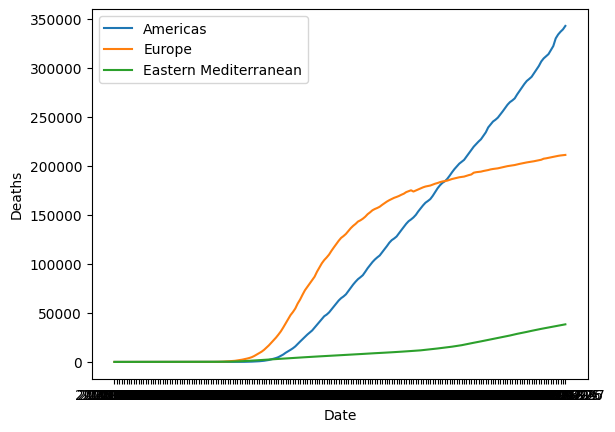

In [26]:
#Criando um data frame so com os dados necessario da primeira questão
dados_1=reviews.groupby(['Date' , 'WHO Region']).Deaths.sum().reset_index()
#Criando as variaveis uma por uma 'olhar se existe um metodo avançado'
Europe=dados_1.loc[dados_1['WHO Region']=='Europe']
Americas=dados_1.loc[dados_1['WHO Region']=='Americas']
Eastern_Mediterran=dados_1.loc[dados_1['WHO Region']=='Eastern Mediterranean']
# Plotando o grafico um por um
sns.lineplot(data=Americas, x='Date' , y='Deaths' , label='Americas')
sns.lineplot(data=Europe, x='Date' , y='Deaths' , label='Europe')
sns.lineplot(data=Eastern_Mediterran, x='Date' , y='Deaths' , label='Eastern Mediterranean')

<Axes: title={'center': 'Mortes de Covid nos continentes'}, xlabel='Continent', ylabel='Deaths'>

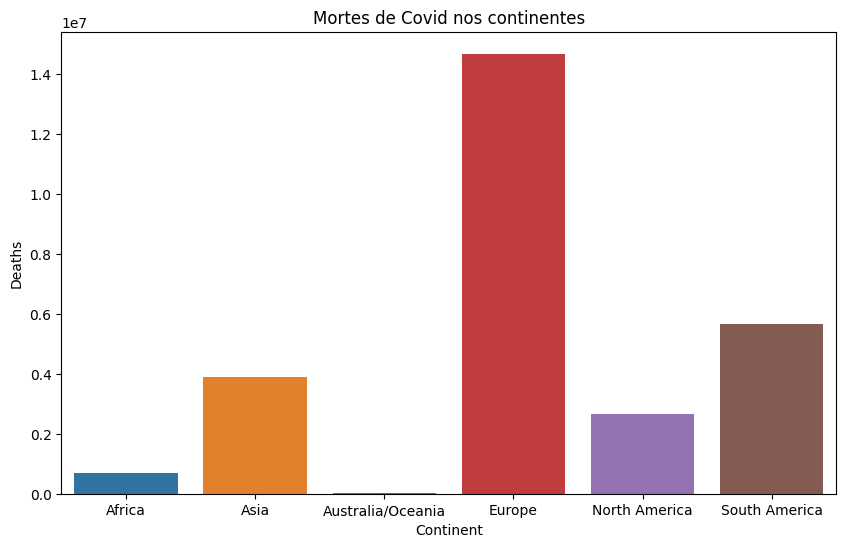

In [27]:
# QUESTÃO 2
plt.figure(figsize=(10,6))
plt.title("Mortes de Covid nos continentes")
sns.barplot(x=final.index, y=final['Deaths'])

<Axes: xlabel='Mortes por Milhão', ylabel='Population'>

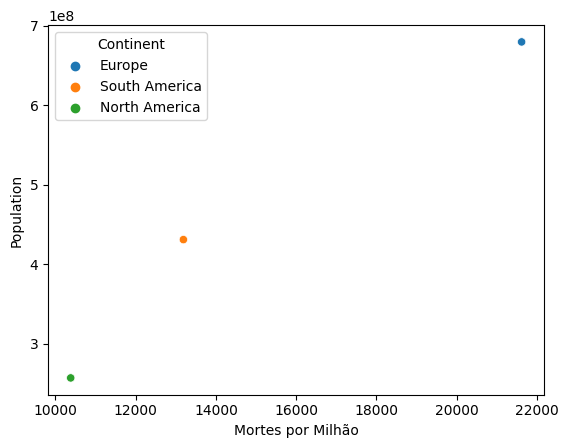

In [28]:
#QUESTÃO 3
dados_3=final.groupby(['Continent','Population'])['Mortes por Milhão'].mean().reset_index().sort_values(by='Mortes por Milhão' , ascending=False)
dados_3=dados_3.head(3)
sns.scatterplot(x=dados_3['Mortes por Milhão'], y=dados_3['Population'], hue=dados_3['Continent'])


In [29]:
lista


,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.000,5032179,NaN,162804.000,NaN,2576668.000,NaN,2292707.000,18296.000,15194.000,492.000,63139605.000,190640.000,Americas
1,Brazil,South America,212710692.000,2917562,NaN,98644.000,NaN,2047660.000,NaN,771258.000,8318.000,13716.000,464.000,13206188.000,62085.000,Americas
2,India,Asia,1381344997.000,2025409,NaN,41638.000,NaN,1377384.000,NaN,606387.000,8944.000,1466.000,30.000,22149351.000,16035.000,South-EastAsia
3,Russia,Europe,145940924.000,871894,NaN,14606.000,NaN,676357.000,NaN,180931.000,2300.000,5974.000,100.000,29716907.000,203623.000,Europe
4,South Africa,Africa,59381566.000,538184,NaN,9604.000,NaN,387316.000,NaN,141264.000,539.000,9063.000,162.000,3149807.000,53044.000,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4992.000,13,NaN,1.000,NaN,10.000,NaN,2.000,NaN,2604.000,200.000,61.000,12220.000,NaN
205,Caribbean Netherlands,North America,26247.000,13,NaN,NaN,NaN,7.000,NaN,6.000,NaN,495.000,NaN,424.000,16154.000,NaN
206,Falkland Islands,South America,3489.000,13,NaN,NaN,NaN,13.000,NaN,0.000,NaN,3726.000,NaN,1816.000,520493.000,NaN
207,Vatican City,Europe,801.000,12,NaN,NaN,NaN,12.000,NaN,0.000,NaN,14981.000,NaN,NaN,NaN,Europe


In [30]:
#QUESTÃO 4
#fazendo as correlacão
dados_4=lista.select_dtypes(exclude='object')
corr=dados_4.corr()
corr

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Population,1.000,0.546,0.890,0.431,0.911,0.590,0.854,0.459,0.595,-0.009,0.026,0.498,-0.075
TotalCases,0.546,1.000,0.999,0.939,0.998,0.986,0.998,0.969,0.967,0.253,0.280,0.891,0.029
NewCases,0.890,0.999,1.000,0.992,0.996,0.991,1.000,0.936,0.986,0.321,0.842,0.215,-0.669
TotalDeaths,0.431,0.939,0.992,1.000,1.000,0.935,0.988,0.928,0.907,0.237,0.425,0.850,0.054
NewDeaths,0.911,0.998,0.996,1.000,1.000,0.999,0.993,0.889,0.997,0.046,0.752,0.039,-0.803
TotalRecovered,0.590,0.986,0.991,0.935,0.999,1.000,0.986,0.915,0.950,0.268,0.296,0.870,0.022
NewRecovered,0.854,0.998,1.000,0.988,0.993,0.986,1.000,0.938,0.981,0.167,0.826,-0.082,-0.870
ActiveCases,0.459,0.969,0.936,0.928,0.889,0.915,0.938,1.000,0.946,0.213,0.255,0.911,0.029
"Serious,Critical",0.595,0.967,0.986,0.907,0.997,0.950,0.981,0.946,1.000,0.210,0.272,0.860,0.021
Tot Cases/1M pop,-0.009,0.253,0.321,0.237,0.046,0.268,0.167,0.213,0.210,1.000,0.502,0.194,0.303


Text(0.5, 1.0, 'MAPA DE CALOR DA CORRELAÇÃO')

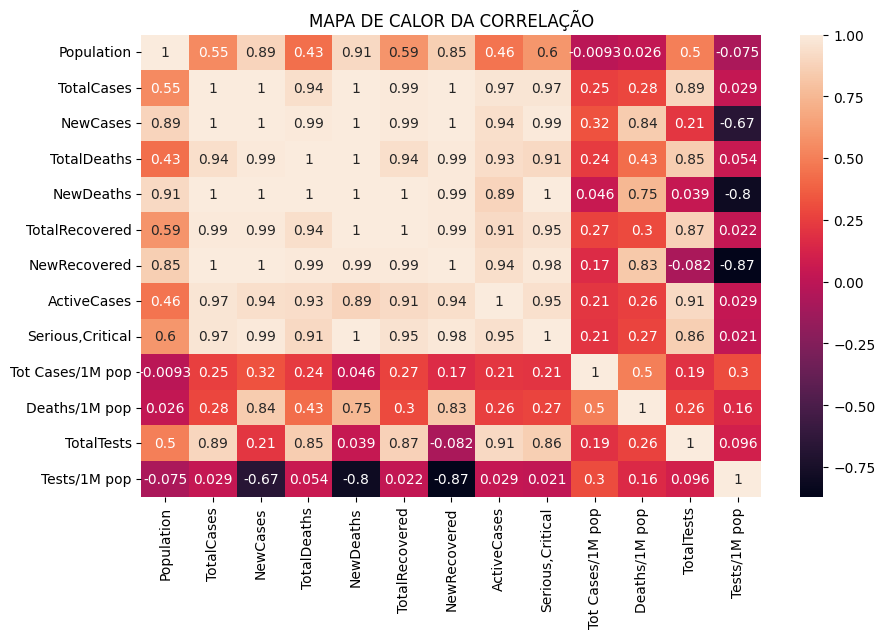

In [31]:
#fazendo o heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.title("MAPA DE CALOR DA CORRELAÇÃO")

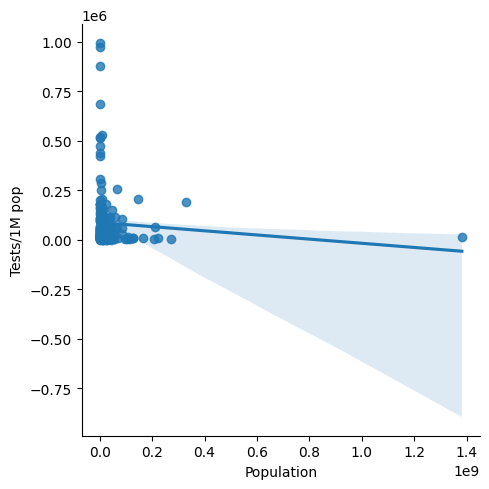

In [32]:
#vizualizando as correlação DA POPULAÇÃO E TESTE POR MILHÃO
sns.lmplot(x="Population", y="Tests/1M pop", data=dados_4)

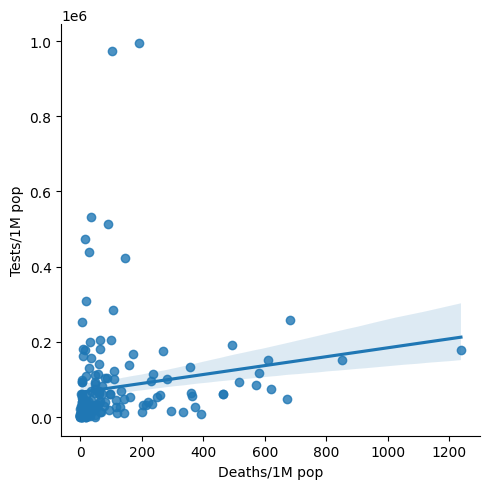

In [33]:
#vizualizando as correlação TESTE POR MILHÃO E MORTES POR MILHÃO
sns.lmplot(x="Deaths/1M pop", y="Tests/1M pop", data=dados_4)